In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

# reading features list 
data = pd.read_csv("kddcup99_csv.csv")
print(data[:10])


   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   
5         0           tcp    http   SF        217       2032     0   
6         0           tcp    http   SF        212       1940     0   
7         0           tcp    http   SF        159       4087     0   
8         0           tcp    http   SF        210        151     0   
9         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                 

In [2]:
output = data['label'].values

In [3]:
print(output)

['normal' 'normal' 'normal' ... 'normal' 'normal' 'normal']


In [4]:
len(output)

494020

In [5]:
labels = set(output)

In [6]:
print(labels)

{'back', 'loadmodule', 'rootkit', 'phf', 'smurf', 'imap', 'warezclient', 'buffer_overflow', 'neptune', 'teardrop', 'satan', 'ipsweep', 'normal', 'portsweep', 'nmap', 'guess_passwd', 'spy', 'multihop', 'perl', 'warezmaster', 'land', 'ftp_write', 'pod'}


In [7]:
data.shape

(494020, 42)

In [8]:
 
attacks_types = { 
'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l'
} 


In [9]:
data['Attack Type'] = data['label'].map(attacks_types)

In [10]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,normal


In [11]:
output = data['Attack Type'].values

In [12]:
dt = set(output)

In [13]:
print(dt)

{'u2r', 'r2l', 'dos', 'probe', 'normal'}


In [14]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

C:\Users\vinee\AppData\Local\Temp\ipykernel_11284\811828670.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = data.dropna('columns')# drop columns with NaN
C:\Users\vinee\AppData\Local\Temp\ipykernel_11284\811828670.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


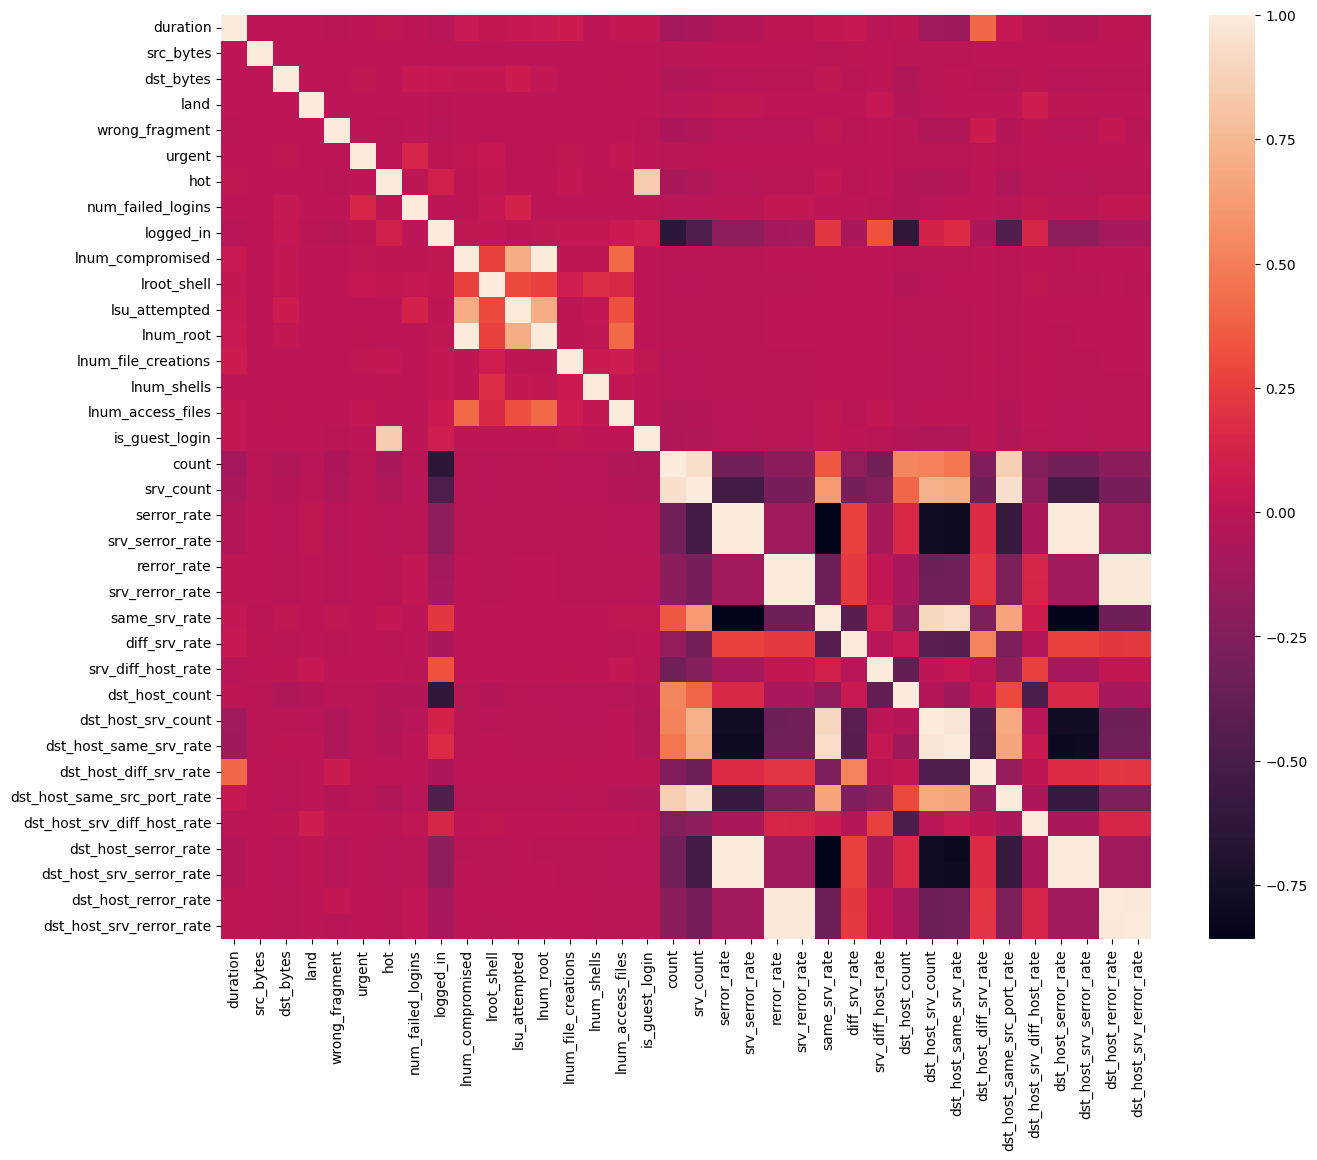

In [15]:
 

data = data.dropna('columns')# drop columns with NaN 

data = data[[col for col in data if data[col].nunique() > 1]]# keep columns where there are more than 1 unique values 

corr = data.corr() 

plt.figure(figsize =(15, 12)) 

sns.heatmap(corr) 

plt.show() 



In [16]:
ch = data.corr(method='pearson', numeric_only=True)

In [17]:
type(ch)

pandas.core.frame.DataFrame

In [18]:
ch

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,...,0.010073,-0.117516,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,...,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,...,-0.048869,-0.005849,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,...,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,...,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,...,-0.007139,-0.004541,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105306,0.007348,...,-0.026367,-0.038731,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,...,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105306,-0.001145,1.000000,0.013612,...,-0.621023,0.119324,0.161080,-0.061150,-0.461555,0.140495,-0.190954,-0.191703,-0.090868,-0.087885
lnum_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,...,-0.008361,-0.004797,-0.002584,0.000359,-0.006715,0.000621,-0.001978,-0.001631,-0.000843,-0.000873


In [19]:
ds = ch.to_numpy()

In [20]:
ds

array([[ 1.00000000e+00,  4.25822992e-03,  5.43953789e-03, ...,
        -3.06124242e-02,  6.73912903e-03,  1.04646044e-02],
       [ 4.25822992e-03,  1.00000000e+00, -1.59663607e-06, ...,
         1.12209268e-03, -3.92692824e-04,  1.32835643e-03],
       [ 5.43953789e-03, -1.59663607e-06,  1.00000000e+00, ...,
        -1.12348806e-02, -4.99961016e-03, -5.47080377e-03],
       ...,
       [-3.06124242e-02,  1.12209268e-03, -1.12348806e-02, ...,
         1.00000000e+00, -1.13184709e-01, -1.15320687e-01],
       [ 6.73912903e-03, -3.92692824e-04, -4.99961016e-03, ...,
        -1.13184709e-01,  1.00000000e+00,  9.84803835e-01],
       [ 1.04646044e-02,  1.32835643e-03, -5.47080377e-03, ...,
        -1.15320687e-01,  9.84803835e-01,  1.00000000e+00]])

In [21]:
ds.shape

(36, 36)

In [22]:
import math

In [23]:
l = []
for i in range(36):
    for j in range(i):
        if abs(ds[i][j]) > 0.95:
            
            ch = []
            ch.append(i)
            ch.append(j)
            l.append(ch)
            
            


In [24]:
print(l)

[[12, 9], [20, 19], [22, 21], [28, 27], [32, 19], [32, 20], [33, 19], [33, 20], [33, 32], [34, 21], [34, 22], [35, 21], [35, 22], [35, 34]]


In [25]:
 


data.drop('lnum_root', axis = 1, inplace = True) 


data.drop('srv_serror_rate', axis = 1, inplace = True) 


data.drop('srv_rerror_rate', axis = 1, inplace = True) 


data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 


data.drop('dst_host_serror_rate', axis = 1, inplace = True) 


data.drop('dst_host_rerror_rate', axis = 1, inplace = True) 


data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 


data.drop('dst_host_same_srv_rate', axis = 1, inplace = True) 



In [26]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal,normal


In [27]:
 
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
data['protocol_type'] = data['protocol_type'].map(pmap) 


In [28]:
 
# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
data['flag'] = data['flag'].map(fmap) 



In [29]:
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal,normal


In [31]:
check = data['service'].values

In [32]:
checkk = set(check)

In [33]:
print(checkk)

{'http_443', 'smtp', 'urh_i', 'imap4', 'courier', 'ssh', 'pm_dump', 'private', 'netbios_dgm', 'iso_tsap', 'exec', 'csnet_ns', 'uucp_path', 'hostnames', 'domain', 'whois', 'ecr_i', 'X11', 'red_i', 'pop_3', 'kshell', 'name', 'sunrpc', 'vmnet', 'tim_i', 'link', 'eco_i', 'time', 'netbios_ns', 'pop_2', 'ftp', 'bgp', 'nnsp', 'Z39_50', 'ntp_u', 'klogin', 'finger', 'daytime', 'discard', 'netstat', 'urp_i', 'printer', 'ldap', 'auth', 'efs', 'http', 'mtp', 'other', 'gopher', 'ctf', 'sql_net', 'telnet', 'remote_job', 'uucp', 'domain_u', 'systat', 'login', 'netbios_ssn', 'IRC', 'nntp', 'supdup', 'shell', 'ftp_data', 'rje', 'echo', 'tftp_u'}


In [30]:
data.drop(columns = ['service'], inplace = True)

In [31]:
data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal,normal


In [32]:
attack_typee = {
    'normal' : 0,
    'u2r' : 1,
    'dos' : 2,
    'r2l' : 3,
    'probe' : 4
}

Finally Model banayenge


In [33]:
data['Attack Type'] = data['Attack Type'].map(attack_typee)

In [34]:
 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 



In [35]:
data.shape

(494020, 32)

In [36]:
 
# Splitting the dataset 
data.drop(['label'], inplace = True, axis = 1)
print(data.shape) 
 
# Target variable and train set 
y = data[['Attack Type']]
X = data.drop(['Attack Type', ], axis = 1) 

sc = MinMaxScaler() 
X = sc.fit_transform(X) 

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape) 



(494020, 31)
(330993, 30) (163027, 30)
(330993, 1) (163027, 1)


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


In [38]:
model = Sequential([
  Dense(128, activation='relu'),
  Dense(32 , activation = 'relu'),
  Dense(5, activation = 'softmax')])

In [39]:
type(X_train)

numpy.ndarray

In [40]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics = 'accuracy'
)

model.fit(X_train,y_train,epochs=10)

Epoch 1/10



C:\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(



10344/10344 [==============================] - 30s 3ms/step - loss: 0.0162 - accuracy: 0.9961
Epoch 2/10
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 3/10
10344/10344 [==============================] - 30s 3ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 4/10
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 5/10
10344/10344 [==============================] - 30s 3ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 6/10
10344/10344 [==============================] - 30s 3ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 7/10
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 8/10
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 9/10
10344/10344 [==============================] - 29s 3ms/step - loss: 0.0030 - accuracy: 0.9991
Epoch 10/10
10344/10344 [==============================] - 29s 3m

In [41]:
p = model.predict(X_train)

10344/10344 [==============================] - 22s 2ms/step


In [42]:
print(p[:2])

[[9.9992490e-01 5.6284757e-06 3.9247469e-10 5.4835316e-05 1.4685703e-05]
 [9.9765813e-01 4.9515179e-04 5.6099186e-08 7.3203089e-04 1.1146616e-03]]


In [43]:
for i in range(5):
    print( f"{p[i]}, category: {np.argmax(p[i])}")

[9.9992490e-01 5.6284757e-06 3.9247469e-10 5.4835316e-05 1.4685703e-05], category: 0
[9.9765813e-01 4.9515179e-04 5.6099186e-08 7.3203089e-04 1.1146616e-03], category: 0
[2.1456346e-15 0.0000000e+00 1.0000000e+00 9.0028037e-31 0.0000000e+00], category: 2
[9.9997127e-01 1.7239906e-07 2.3520042e-05 3.1351767e-06 1.9543095e-06], category: 0
[2.6987122e-08 2.4475951e-33 1.0000000e+00 1.7998819e-11 1.8474292e-10], category: 2


In [44]:
evaluation  = model.evaluate(X_test, y_test, verbose = 2)

C:\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5095/5095 - 11s - loss: 0.0036 - accuracy: 0.9992 - 11s/epoch - 2ms/step


In [45]:
print(evaluation[1])

0.9992087483406067


In [46]:
from sklearn.ensemble import RandomForestClassifier 

In [47]:
# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
y_train = np.ravel(y_train)
clf.fit(X_train, y_train) 


# performing predictions on the test dataset 
y_pred = clf.predict(X_test) 

# metrics are used to find accuracy or error 
from sklearn import metrics 
print() 

# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)) 



ACCURACY OF THE MODEL:  0.9996319628037074


In [48]:
from sklearn.svm import SVC

In [49]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9996319628037074


In [50]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.878578394989787
